# <font color='green' style='font-size: 40px;'>QUESTÃO 1 (feito)</font> <hr style='border: 2px solid green;'>

Considere a imagem:

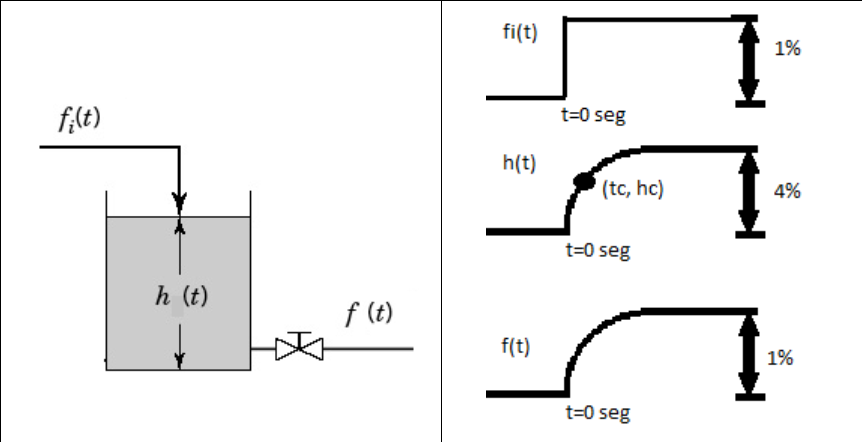



## <font color='green' style='font-size: 22px;'>a) Encontre as funções de transferência H(s)/Fi(s) e F(s)/Fi(s). Assume que o ponto da resposta transitória é tc= 30 segundos e hc= 3%.</font> 

Para uma entrada degrau unitário, a resposta do sistema é uma exponencial. Além disso, só há um elemento armazenador de energia, a altura. Com isso, podemos concluir que se trata de um sistema de primeira ordem.

Suponhamos que a resposta seja dada pela exponencial característica no domínio do tempo:

$$ y(t) = A(1-e^{-t/T}) $$

Sabemos que para t = T, o sistema reponde em aproximadamente 63% do sinal relevante. Considerando que em $t=30$ já tivemos 75% da resposta — 4/3 —, é a constante de tempo T está entre 20 e 30 segundos. 

Tomando o ponto $t = 30$ e $A=4$, temos:

$$ y(30) = 4(1-e^{-30/T})$$
$$ 3 = 4(1-e^{-30/T}) → T \approx 21.6 $$

Com isso, temos:

$$ y(t) = 1(1-e^{-t/21.6}) $$

que no domínio de Laplace fica:

$$ Y(s) = \frac{1}{s} - \frac{1}{s + \frac{1}{21.6}}$$

Conclusão:

$$ H(s) = \frac{1}{21.6s+1}$$


De maneira análoga, a resposta de $f_i(t)$ também é uma exponencial. Por se tratar de um sistema linear, a constante de tempo é a mesma. Logo, 

# <font color='green' style='font-size: 40px;'>QUESTÃO 2 (feito) </font> <hr style='border: 2px solid green;'>

<font color='skyblue' style='font-size: 16px;'> 

> DUVIDAS

qual é tipo de controlador é esse da b)? é um integrador?


Dado o diagrama de blocos abaixo.

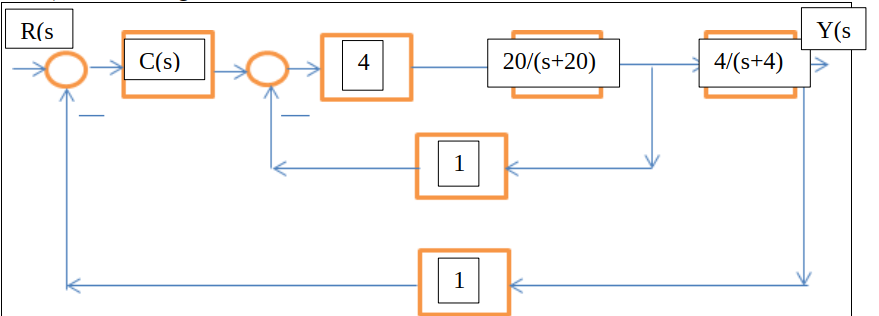




## <font color='green' style='font-size: 24px;'>a) Com 𝐶(𝑠) = 𝐾. Encontre K para que o erro de regime a uma referência do tipo degrau unitário seja igual a 0,02.</font> 

Neste caso, nossa função de transferência de malha aberta será:

$$
\frac{320k}{(s+100)(s+4)}
$$

Então, pelo teorema do valor final (considerando uma entrada degrau), temos:

$$
\lim _{s\to \:0}s\left(\frac{320k}{(s+100)(s+4)}\right)\frac{1}{s}= 0.8k
$$

Assim sendo, $0.8k=0.02 → k= 0.025$

In [48]:
import numpy as np
import control

# Definindo a função transferência
k=0.025
num = [320*k]
den = [1,104,400]
sys = control.tf(num, den)

# Calculando as informações da resposta ao degrau
info = control.step_info(sys)

# Imprimindo o erro de estado estacionário
print('Erro de estado estacionário: ', 1-info['SteadyStateValue'])


Erro de estado estacionário:  0.98


### Memória de cálculo <hr style='line: 2px solid white;'>

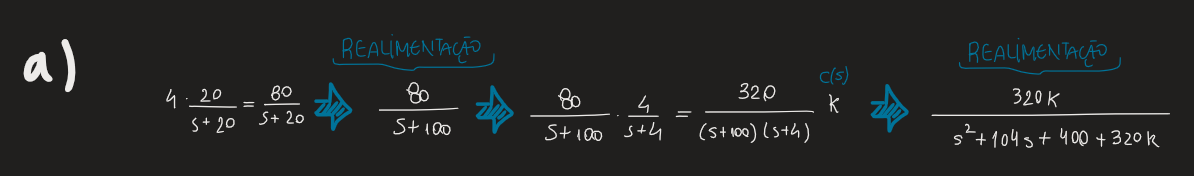

## <font color='green' style='font-size: 24px;'> b) Com 𝐶(𝑠) = 𝐾(1 + 1/0.01𝑠). Encontre os valores de K que tornam o sistema subamortecido. Calcule o valor de K que resulta no sobressinal de 20% para uma referência do tipo degrau unitário.

- Para um sistema ser subamortecido, $0<\epsilon<1$. Assim, precisamos encontrar um K que torne a função transferência de malha fechada subamortecida. 
- Além disso, podemos constranger o $\epsilon$ isolando-o e considerando $M_p = 20%$ :
$$ M_p\left(\%\right)=e^{\frac{-\xi \pi }{\sqrt{1-\xi ^2}}}100\% $$

Neste caso, nossa função transferência de *malha aberta* será:

$$
\frac{320k\left(0.01s+1\right)}{0.01s\left(s+100\right)\left(s+4\right)}
$$

e nossa função transferência de *malha fechada* será:

$$
\frac{320k (0.01s+1)}{0.01s^3+1.04s^2+(4+3.2k)s+320k}
$$

Perceba que o sistema é de 3º ordem e possui zeros, com isso formulas para os parâmetros $\zeta$ , $\omega_n$, $t_s$, etc. Não podem ser aplicadas! Nossa saída será julgar se esse sistema possui polos complexos conjugados dominantes, pois poderemos usar o princípio dos polos dominantes para '*aproximar*' este sistema para um de 2º ordem, fazendo valer assim, as fórmulas.

In [184]:
import numpy as np
import control as ctl
import pandas as pd

# para qualquer valor de k, temos dois em -2 e um em -100
k=1

# Definindo a função de transferência
num = [3.2*k,320*k]
den = [0.01, 1.04, 4+3.2*k,320*k]
sys = ctl.tf(num, den)

# Obtendo as raízes da função de transferência
poles = sys.pole()

# Organizando as raízes em um dataframe
df = pd.DataFrame({'Real': np.real(poles), 'Imaginário': np.imag(poles)})

# Imprimindo o dataframe
df


,Real,Imaginário
0,-100.0,0.000000
1,-2.0,17.776389
2,-2.0,-17.776389


Uma função de transferência com três polos seria algo do tipo:

$$
\frac{\omega_n^2}{(s+p)(s^2+2\zeta\omega_ns+\omega_n^2)}
$$

A partir dos três polos obtidos com a função 'control.pole()', seguramente podemos dizer que $p=-100$. Felizmente, ele é completamente desprezível em relação aos nossos polos complexos e conjugados, isso porque está há uma distância horizontal de muito mais que 5 vezes — que é a distância que a maior parte dos livros recomendam para se adotar o princípio.

Com isso, precisamos encontrar a equação de 2º ordem resultante apartir da separação desse termo. É com base nela que iremos definir nosso k. Ela será a seguinte:

$$
\frac{320k (0.01s+1)}{0.01s^3+1.04s^2+(4+3.2k)s+320k} → \frac{1}{(0.01s+1)}\underbrace{\frac{320k}{(s^2+4s+320k)}}_\text{nossa expressão de 2º ordem equivalente} (0.01s+1)
$$

> obs: Perceba que o zero e o polo adicionados pelo controlador realmente se cancelam. Podemos esperar que essa expressão de 2º ordem modele perfeitamente o comportamento do sistema. Mais abaixo, plotarei o gráfico das duas expressões sobrepostas.

Agora, basta descobrir qual deve ser nosso coeficiente de amortecimento. Abaixo, defini uma função python que calcula o $\zeta$ em função de um sobressinal, $M_p$(%).

In [44]:
import numpy as np

def calc_zeta(sobressinal):
    """
    Calcula o coeficiente de amortecimento para um determinado sobressinal.
    """
    zeta = -np.log(sobressinal/100) / np.sqrt(np.pi**2 + np.log(sobressinal/100)**2)
    print('Para sobressinal {}% você deve ter zeta: {:.2f}'.format(sobressinal, zeta))
    return round(zeta, 2)


calc_zeta(20)


Para sobressinal 20% você deve ter zeta: 0.46


0.46

Com isso, podemos descobrir nosso k:

$$
2 \zeta \omega_n = 4 →  2 (0.46) \sqrt{320k} = 4 → \boxed {k \approx 0.06 }
$$

Vamos plotar os dois gráficos — expressão de 3º ordem e 2º ordem — na mesma imagem, além disso, vamos comparar os parâmetros para uma entrada degrau.

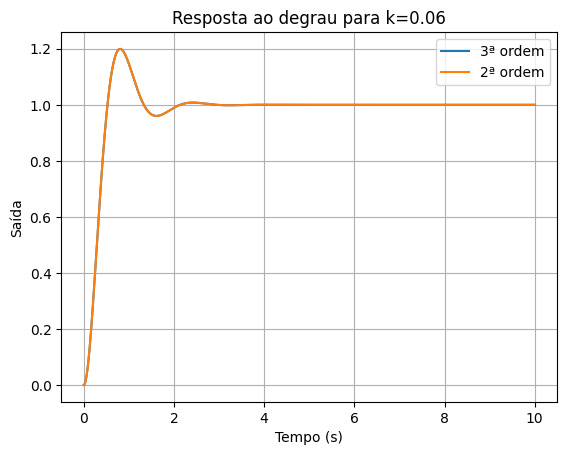

,Rise Time,Settling Time,Overshoot,Peak
sys1,0.355059,1.901014,19.956720,1.199567
sys2,0.348877,1.918821,19.954539,1.199545


In [208]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Valor de 'k' calculado.
k = 0.06

# Definindo a função de transferência de 3ª ordem
num1 = [3.2*k, 320*k]
den1 = [0.01, 1.04, 4+3.2*k, 320*k]
sys1 = ctl.TransferFunction(num1, den1)

# Definindo a função de transferência de 2ª ordem
num2 = [320*k]
den2 = [1, 4, 320*k]
sys2 = ctl.TransferFunction(num2, den2)

# Obtendo a resposta ao degrau
t, y1 = ctl.step_response(sys1, T=np.linspace(0, 10, 1000), input=0)
t, y2 = ctl.step_response(sys2, T=np.linspace(0, 10, 1000), input=0)

# Plotando o gráfico
plt.plot(t, y1, label='3ª ordem')
plt.plot(t, y2, label='2ª ordem')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.title('Resposta ao degrau para k={}'.format(k))
plt.grid()
plt.legend()
plt.show()

# Calculando as informações da resposta ao degrau
info1 = ctl.step_info(sys1)
info2 = ctl.step_info(sys2)

# Criando o dataframe
df = pd.DataFrame({'Rise Time': [info1['RiseTime'], info2['RiseTime']],
                   'Settling Time': [info1['SettlingTime'], info2['SettlingTime']],
                   'Overshoot': [info1['Overshoot'], info2['Overshoot']],
                   'Peak': [info1['Peak'], info2['Peak']]},
                  index=['sys1', 'sys2'])

# Imprimindo o dataframe
df


### Memória de cálculo <hr style='line: 2px solid white;'>

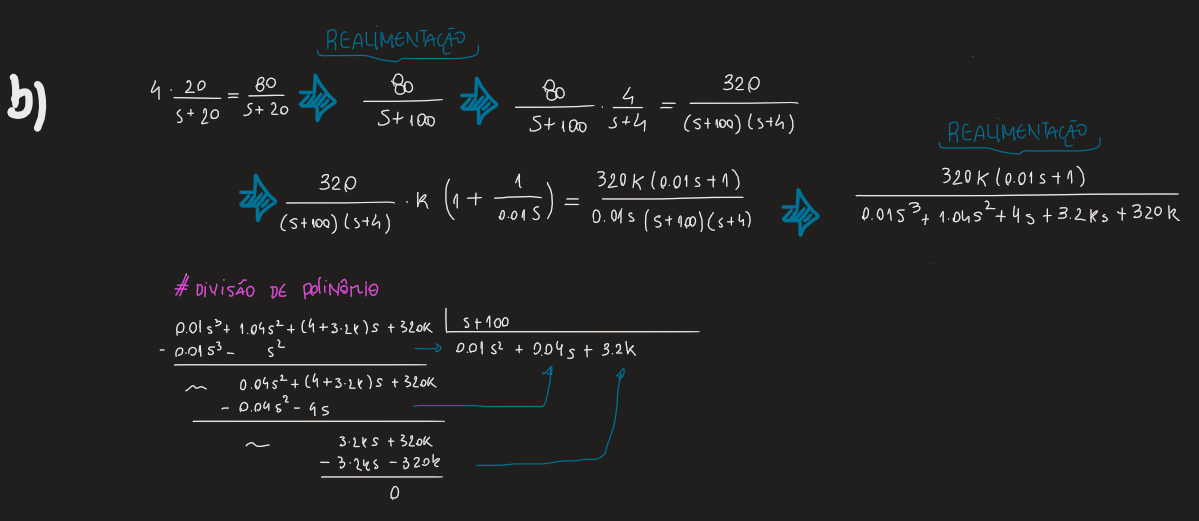

## <font color='green' style='font-size: 22px;'>c) Com 𝐶(𝑠) = 𝐾(1 + 1/0.02 𝑠 ). Encontre para que valores de K o sistema será estável.</font>

De maneira análoga a questão anterior, estaremos aumentando a ordem do nosso sistema. A melhor maneira de verificar rapidamente a estabilidade de um sistema para um parâmentro 'k' é usando o ***critérido de estabilidade de Routh***. Ele diz o seguinte:

    "Todas as raizes de um sistema — independente de sua ordem — residem no semi-plano esquerdo do plano s se, e somente se, um determinado conjunto de combinações algébricas dos coeficientes desse sistema tiver o mesmo sinal"

> A matemática por trás deste princípio (que na prática é um algoritmo) é o calculo de determinantes envolvendo os coeficientes da equação característica do sistema. O que se produz é uma tabela onde *não podem haver mudanças de sinal*, pois a mudança do sinal do determinante indica que ali alguma raiz está no semi-plano direito.

Em outras palavras, é possível determinar se um sistema é estável somente olhando para seus coeficientes. Então, considerando nossa função transferência:

$$
\frac{320k (0.02s+1)}{0.02s^3+2.08s^2+(8+6.4k)s+320k}
$$

Vamos determinar nossa tabela:


De maneira análoga a questão anterior, estaremos aumentando a ordem do nosso sistema. A melhor maneira de verificar rapidamente a estabilidade de um sistema para um parâmentro 'k' é usando o ***critérido de estabilidade de Routh***. Ele diz o seguinte:

    "Todas as raizes de um sistema — independente de sua ordem — residem no semi-plano esquerdo do plano s se, e somente se, um determinado conjunto de combinações algébricas dos coeficientes desse sistema tiver o mesmo sinal"

> A matemática por trás deste princípio (que na prática é um algoritmo) é o calculo de determinantes envolvendo os coeficientes da equação característica do sistema. O que se produz é uma tabela onde *não podem haver mudanças de sinal*, pois a mudança do sinal do determinante indica que ali alguma raiz está no semi-plano direito.

Em outras palavras, é possível determinar se um sistema é estável somente olhando para seus coeficientes. Então, considerando nossa função transferência:

$$
\frac{320k (0.02s+1)}{0.02s^3+2.08s^2+(8+6.4k)s+320k}
$$

Vamos determinar nossa tabela:

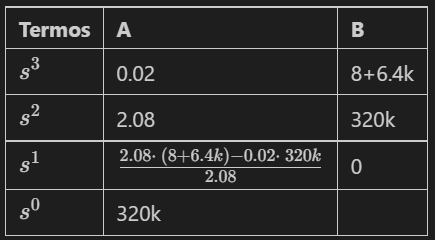

Precisamos que todos os valores da coluna A mantenham seu sinal. Para isso, a seguinte restrição deve ser atendida:

$$
\begin{cases}
2.08 \cdot (8+6.4k) > 0.02 \cdot 320k → \boxed {k > -2.27} \\
k > 0 
\end{cases}
$$

Como o segundo critério, $k>0$, supera o primeiro, $k > -2.27$, ele é suficiente. Vamos agora fazer duas simulações e verificar.


Precisamos que todos os valores da coluna A mantenham seu sinal. Para isso, a seguinte restrição deve ser atendida:

$$
\begin{cases}
2.08 \cdot (8+6.4k) > 0.02 \cdot 320k → \boxed {k > -2.27} \\
k > 0 
\end{cases}
$$

Como o segundo critério, $k>0$, supera o primeiro, $k > -2.27$, ele é suficiente. Vamos agora fazer duas simulações e verificar.

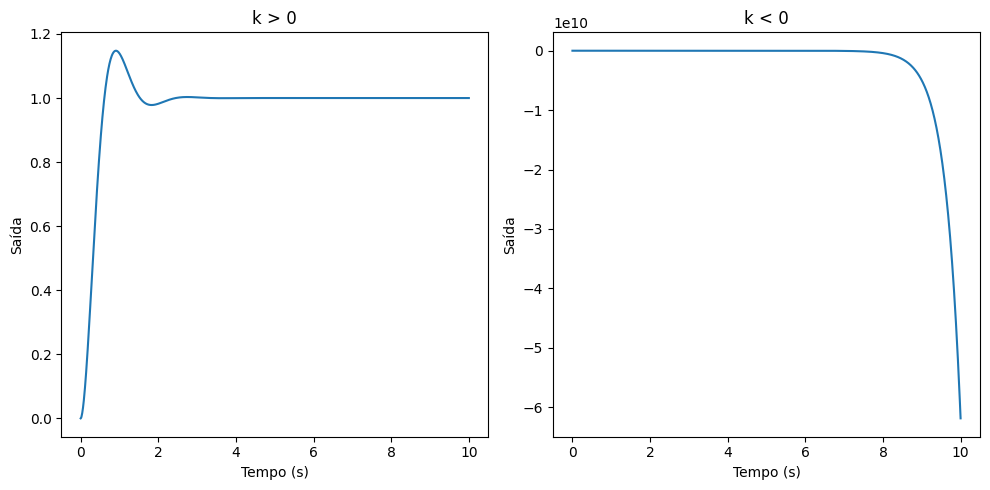

In [224]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definindo função com K estável
k_1 = 0.1
num1 = [6.4*k_1, 320*k_1]
den1 = [0.02, 2.08, 8+6.4*k_1, 320*k_1]
sys1 = ctl.TransferFunction(num1, den1)

# Definindo Definindo função com K instável
k_2 = -0.1
num2 = [6.4*k_2, 320*k_2]
den2 = [0.02, 2.08, 8+6.4*k_2, 320*k_2]
sys2 = ctl.TransferFunction(num2, den2)

# Obtendo a resposta ao degrau
t, y1 = ctl.step_response(sys1, T=np.linspace(0, 10, 1000), input=0)
t, y2 = ctl.step_response(sys2, T=np.linspace(0, 10, 1000), input=0)

# Criando subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plotando o gráfico para k > 0
axs[0].plot(t, y1)
axs[0].set_xlabel('Tempo (s)')
axs[0].set_ylabel('Saída')
axs[0].set_title('k > 0')

# Plotando o gráfico para k < 0
axs[1].plot(t, y2)
axs[1].set_xlabel('Tempo (s)')
axs[1].set_ylabel('Saída')
axs[1].set_title('k < 0')

plt.tight_layout()
plt.show()

### Memória de cálculo <hr style='line: 2px solid white;'>

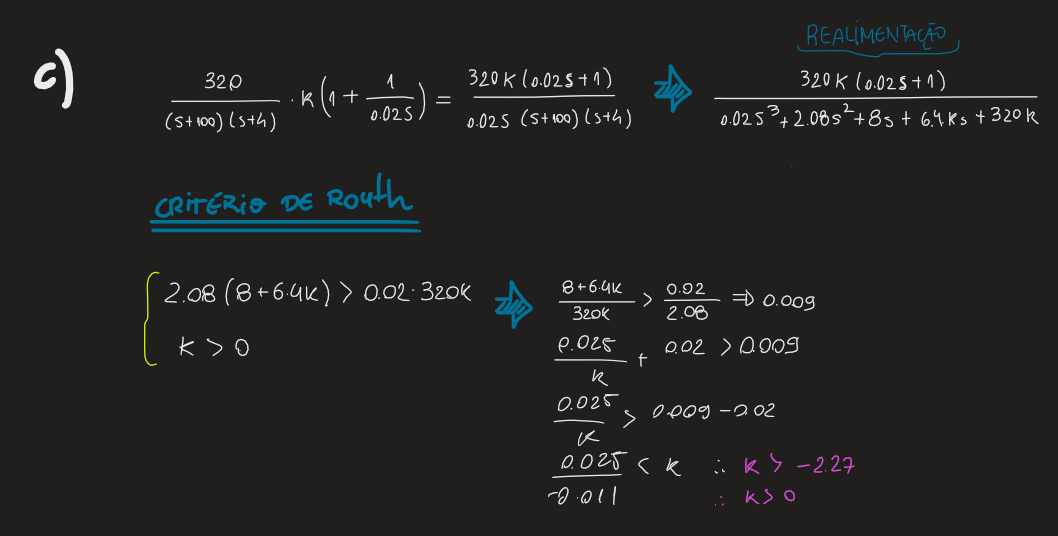

# <font color='green' style='font-size: 40px;'>QUESTÃO 3 (feito) </font> <hr style='border: 2px solid green;'>

## <font color='green' style='font-size: 16px;'> Estabeleça uma equação diferencial de segunda ordem com condições iniciais não nulas. <font>

$\ddot y(t) + 2 \dot y(t) + 5y(t) = u(t),\quad y(0) = 1,\quad \dot y(0) = 0$

## <font color='green' style='font-size: 16px;'> Assuma valores para os coeficientes da equação que resultem em um sistema subamortecido a uma entrada degrau unitária. <font> 

Considerando a EDO anterior, temos:

$$
(s^2 +2s +5)Y(s) = U(s) → \frac{Y(s)}{U(s)} = \frac{1}{s^2 +2s +5}
$$

Considerando a forma canônica de um sistema de segunda ordem no domínio de Laplace, por inspeção, temos:

$$
2 \epsilon \omega_n s = 2s \\
\epsilon \omega_n = 1
$$

mas, $\omega_n^2 = 5 → \omega_n = \sqrt 5$, logo:

$$ \therefore \epsilon = \frac{1}{\sqrt 5}$$

Este valor atende ao critério de coeficiente subamortecido $ 0 < \epsilon < 1 $. Não precisamos modificar nada na EDO.

## <font color='green' style='font-size: 16px;'> Represente no espaço de estado <font> 

Considerando que temos um sistema de segunda ordem, duas variáveis de estado são suficientes para representar o sistema. Tomando as variáveis de estado:
$$
\begin{cases}

x_1 = y(t) \\
x_2 = \dot y(t)

\end{cases}
$$

temos a seguinte dinâmica:

$$
\begin{cases}

\dot x_1 = x_2 \\
\dot x_2 = -2\dot y-5y+u → -2x_2-5x_1+u

\end{cases}
$$

Assim, temos:

$$
\begin{pmatrix} \dot x_1 \\ \dot x_2 \end{pmatrix} = \begin{pmatrix} 0&1 \\ -5&-2 \end{pmatrix} \begin{pmatrix}x_1 \\ \:x_2\end{pmatrix}+\begin{pmatrix}0\\ \:1\end{pmatrix} u 

\tag{eq. de estados}
$$ 
$$
y=\begin{pmatrix} 1&0 \end{pmatrix} \begin{pmatrix} x_1 \\ \:x_2 \end{pmatrix}

\tag{eq. de saídas}
$$ 




## <font color='green' style='font-size: 16px;'> Obtenha uma função de transferência a partir dessa representação.  <font> 

Esse procedimento requer a obtenção da matriz de transição, que será demonstrada aqui:

<u><font color='lightgreen' style='font-size: 12px;' > DEMONSTRAÇÃO  <font></u> 

Considere o espaço de estados:

$$ 
\dot q(t) = A q(t) + Bu(t) \\
y(t) = Cq(t) +Du(t)
$$

Ao aplicar a transformada de Laplace, temos:

$$ 
sQ(s) = A Q(s) + BU(s) \\
Y(s) = CQ(s) +DU(s)
$$

Queremos encontrar a função transferência, que é $\frac{Y(s)}{U(s)}$ , logo, queremos isolar $Y(s)$ e $U(s)$. Façamos:

$$
sQ(s) = A Q(s) + BU(s) \\
(sI-A)Q(s) = BU(s) \\
Q(s) = (sI -A)^{-1} BU(s) = \phi(s)BU(s)
$$

Onde $\phi(s) = (sI -A)^{-1}$, que é nossa matriz de transição de estado. Agora falta isolar a representação matricial de saídas.

$$
Y(s) = C\phi(s)BU(s) +DU(s) \\
= (C\phi(s)B + D)U(s)
$$

Assim, temos:

$$
H(s) = \frac{Y(s)}{U(s)} = C\phi(s)B+D = C(sI - A)^{-1}B+D
$$

→ [fonte da demonstração](https://lpsa.swarthmore.edu/Representations/SysRepTransformations/TF2SS.html)


Assim sendo, basta substituir — observe que em nosso caso, D = 0.

$$
sI-A = s\begin{pmatrix}1&0\\ 0&1\end{pmatrix}-\begin{pmatrix}0&1\\ -5&-2\end{pmatrix}=\begin{pmatrix}s&-1\\ 5&s+2\end{pmatrix}
$$

Agora, $\phi(s) = (sI-A)^{-1}$, que pelas regras de obteção da inversa será:

$$
\phi(s) = \begin{pmatrix}s&-1\\ 5&s+2\end{pmatrix}^{-1}=\begin{pmatrix}\frac{s+2}{s\left(s+2\right)+5}&\frac{1}{s\left(s+2\right)+5}\\ -\frac{5}{s\left(s+2\right)+5}&\frac{s}{s\left(s+2\right)+5}\end{pmatrix}
$$

Finalmente, $H(s)=\frac{Y(s)}{U(s)} = C\phi B + D $, assim:

$$
H(s) = \begin{pmatrix}1&0\end{pmatrix}\begin{pmatrix}\frac{s+2}{s\left(s+2\right)+5}&\frac{1}{s\left(s+2\right)+5}\\ -\frac{5}{s\left(s+2\right)+5}&\frac{s}{s\left(s+2\right)+5}\end{pmatrix}\begin{pmatrix}0\\ \:1\end{pmatrix} = \frac{1}{s\left(s+2\right)+5}
$$

## <font color='green' style='font-size: 16px;'> Use simulações para comprovar que as respostas estão corretas.  <font> 

A função *control.step_responde()* recebe como parâmetro tanto um espaço de estados quanto uma função transferência. Se ao simular a resposta ao degrau para ambas as entradas, obtivermos a mesma resposta, fica comprovado via simulação. 

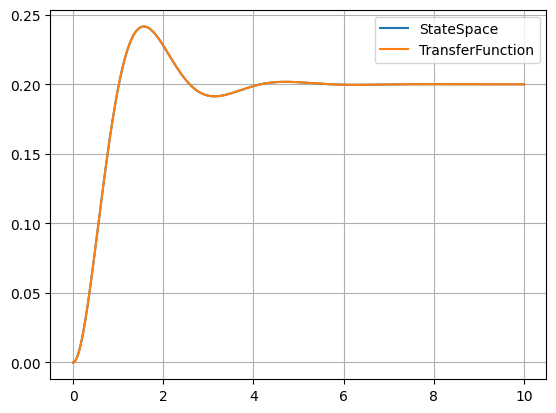

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Cria um sistema de espaço de estados:
A = [[0, 1], [-5, -2]]
B = [[0], [1]]
C = [[1, 0]]
D = [[0]]
sys_ss = ctl.StateSpace(A, B, C, D)

# Cria um sistema de função de transferência:
num = [1]
den = [1, 2, 5]
sys_tf = ctl.TransferFunction(num, den)

# Simula a resposta ao degrau dos dois sistemas:
t = np.linspace(0, 10, 1000)
y_ss, t_ss = ctl.step_response(sys_ss, t)
y_tf, t_tf = ctl.step_response(sys_tf, t)

# Plota os resultados:
plt.plot(y_ss,t_ss, label='StateSpace')
plt.plot(y_tf,t_tf, label='TransferFunction')
plt.legend()
plt.grid()
plt.show()


# <font color='green' style='font-size: 40px;'>QUESTÃO 4 (duvida 'b') </font> <hr style='border: 2px solid green;'>

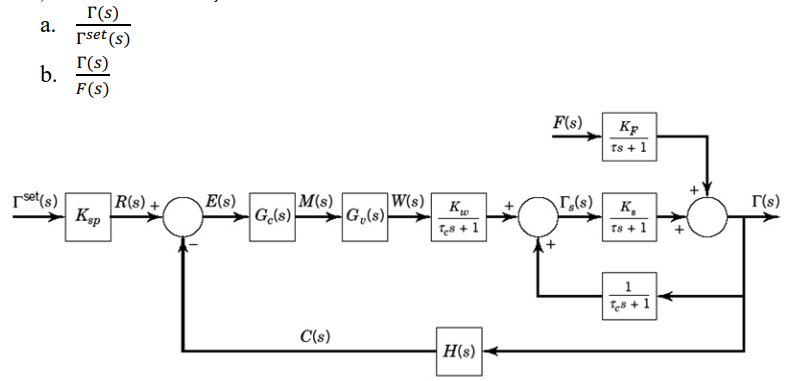

## <font color='green' style='font-size: 24px;'> a) r(s)/rset(s) <font>

Para essa função transferência, devemos desconsiderar a influencia da pertubação em $F(s)$. 

De cara, podemos multiplicar os blocos intermediários para obter o bloco :

$$
\boxed{G_c(s) G_v(s) \frac{k_w}{ \tau_c s+1}}
$$

Além disso, com $F(s)$ nulo, temos uma realimentação positiva para os blocos $\frac{k_s}{\tau_s+1}$ e $\frac{1}{\tau_c s+1}$, o que nos dará:

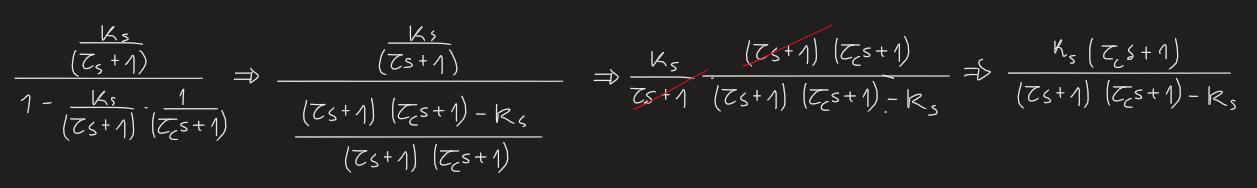

Agora resolvemos a cascata restante:

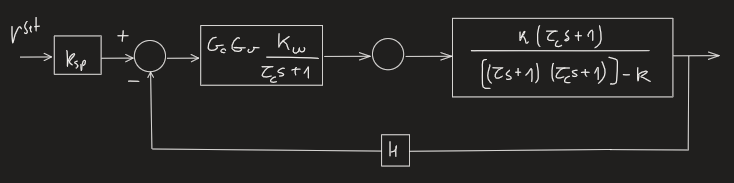

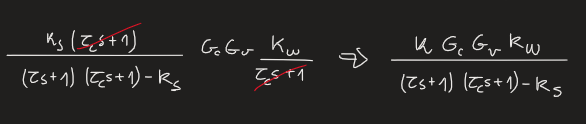

por fim, a realimentação negativa:

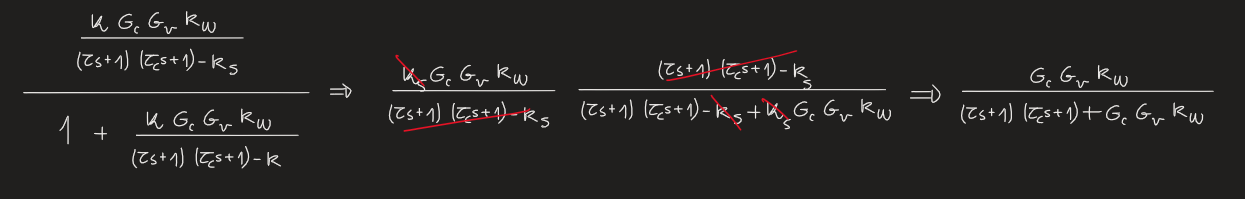

O bloco resultante será:

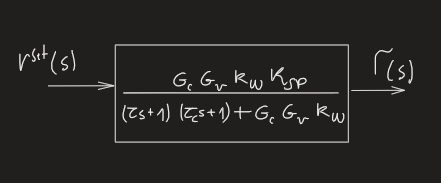

## <font color='green' style='font-size: 24px;'> b) r(s)/F(s) <font>

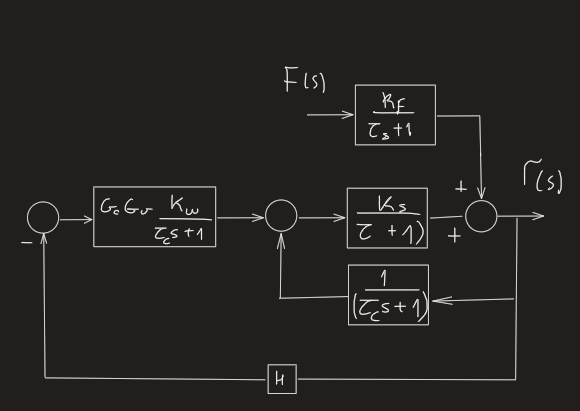

# <font color='green' style='font-size: 40px;'>QUESTÃO 5 (duvida 'a') </font> <hr style='border: 2px solid green;'>

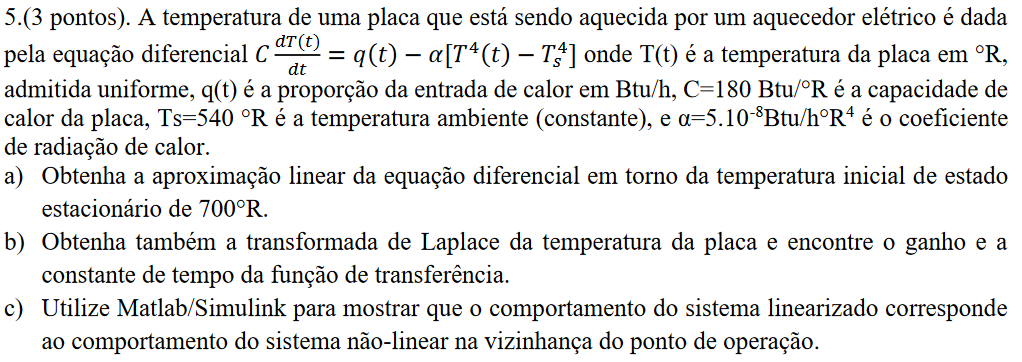

## <font color='green' style='font-size: 24px;'> a) Obtenha a aproximação linear da equação diferencial em torno da temperatura inicial de estado estacionário de 700° R <font>

Primeiro vamos obter nossa equação diferencial:

$$
C\frac{dT(t)}{dt}=q(t)-\alpha [T^4(t)-T_s^4]
→ \frac{dT(t)}{dt} = f(q,T) = \frac{q(t)}{C}-\frac {\alpha [T^4(t)-T_s^4]}{C}
$$


Agora que temos uma equação diferencial, podemos definir uma função linear, $L(x)$, baseada no primeiro termo da expansão de taylor da seguinte maneira:

$$
\boxed{\frac{dT(t)}{dt} \approx f(q_{ss}, T_{ss}) + \frac{\partial f}{\partial q}(x-x_{ss}) + \frac{\partial f}{\partial T}(x-x_{ss})}
$$

As derivadas parciais serão:

$$
\frac{\partial f}{\partial q} =  \frac{1}{C}
$$

$$
\frac{\partial f}{\partial T} =  \frac{4αT^3}{C}
$$

Considerando que no estado estacionário não há variação, $ f(q_{ss}, T_{ss}) = 0$. Com isso, nossa função linear no em torno do ponto será:

$$
\frac{dT(t)}{dt} \approx \frac{1}{C} q(t)+ \frac{4αT^3}{C}T(t) = \frac{1}{180} q(t)+ \frac{4αT^3}{C}T(t)
$$

## <font color='green' style='font-size: 24px;'> b) Obtenha também a transformada de Laplace da temperatura da placa e encontre o ganho e a constante de tempo da função de transferência <font>

## <font color='green' style='font-size: 24px;'> c) Utilize análise numérica para mostrar que o comportamento do sistema linearizado corresponde ao comportamento do sistema não-linear na vizinhança do ponto de operação <font>

# <font color='green' style='font-size: 40px;'>QUESTÃO 6 (fazendo) </font> <hr style='border: 2px solid green;'>


<font color='green' style='font-size: 24px;'> Um sistema subamortecido padrão é submetido a um degrau unitário, encontre a equação da resposta y(t) quando: <font>

## <font color='green' style='font-size: 24px;'> a) Um zero é acrescentado ao sistema subamortecido. <font>

da forma canonica de um sistema de segunda ordem:

$$ H\left(s\right)=\frac{\omega _n^2}{s^2+2\zeta \omega _ns+\omega _n^2} $$



## <font color='green' style='font-size: 24px;'> b) Um polo é acrescentado ao sistema subamortecido. <font>

## <font color='green' style='font-size: 24px;'> c) Use simulações para comprovar as respostas e o efeito dos acréscimos desses termos. <font>

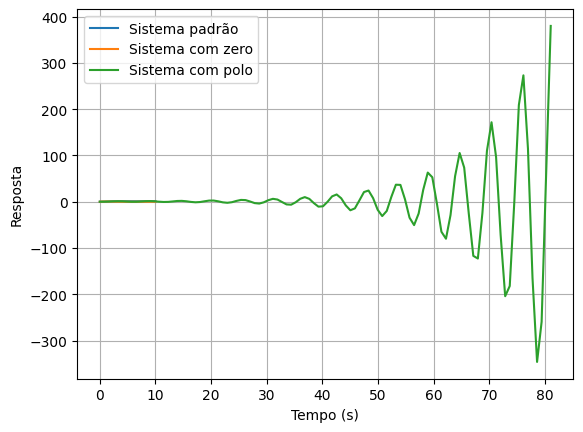

In [54]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Parâmetros do sistema
wn = 1
zeta = 0.7

# Sistema subamortecido padrão
sys = signal.lti([wn**2], [1, 2*zeta*wn, wn**2])

# Sistema com zero adicionado
sys_z = signal.lti([wn**2, 0], [1, 2*zeta*wn, wn**2])

# Sistema com polo adicionado
sys_p = signal.lti([wn**2], [1, 2*zeta*wn, wn**2, 2])

# Resposta do sistema subamortecido padrão
t, y = signal.step(sys)
plt.plot(t, y, label='Sistema padrão')

# Resposta do sistema com zero adicionado
t, y = signal.step(sys_z)
plt.plot(t, y, label='Sistema com zero')

# Resposta do sistema com polo adicionado
t, y = signal.step(sys_p)
plt.plot(t, y, label='Sistema com polo')

plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.legend()
plt.grid()
plt.show()

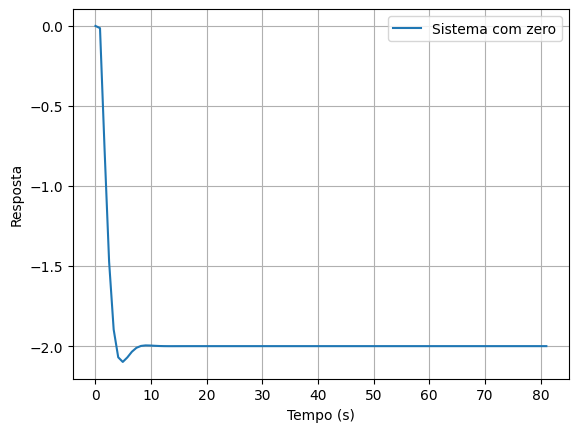

In [71]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Parâmetros do sistema
wn = 1
zeta = 0.7

# Sistema subamortecido padrão
sys = signal.lti([wn**2], [1, 2*zeta*wn, wn**2])

# Sistema com zero adicionado
sys_z = signal.lti([wn**2,-2], [1, 2*zeta*wn, wn**2])

# Sistema com polo adicionado
sys_p = signal.lti([wn**2], [1, 2*zeta*wn, wn**2, 2])

# # Resposta do sistema subamortecido padrão
# t, y, _ = signal.lsim(sys, np.ones_like(t), t)
# plt.plot(t, y, label='Sistema padrão')

# Resposta do sistema com zero adicionado
t_z, y_z, _ = signal.lsim(sys_z, np.ones_like(t), t)
plt.plot(t_z, y_z, label='Sistema com zero')

# # Resposta do sistema com polo adicionado
# t_p, y_p, _ = signal.lsim(sys_p, np.ones_like(t), t)
# plt.plot(t_p, y_p, label='Sistema com polo')

plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.legend()
plt.grid()
plt.show()


# <font color='green' style='font-size: 40px;'>QUESTÃO 7 (fazendo) </font> <hr style='border: 2px solid green;'>

<font color='green' style='font-size: 24px;'> Mostre no plano s a região em que os polos de um sistema de $2^a$ ordem subamortecido devem estar para que: <font>

## <font color='green' style='font-size: 24px;'> a) sobressinal menor que 20% e tempo de acomodação menor que 5 minutos. <font>

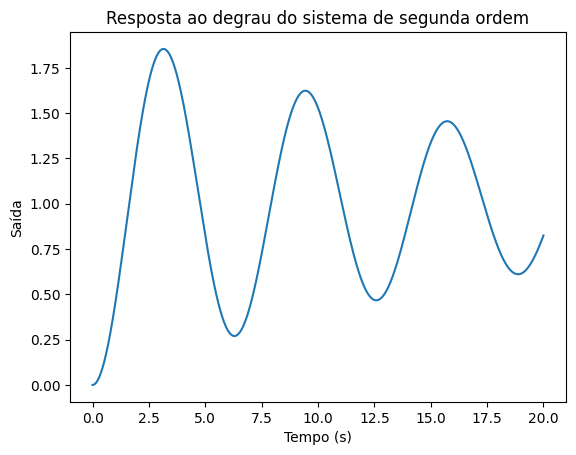

In [4]:
import control
import numpy
import matplotlib.pyplot as plt

# Definir a função de transferência do sistema
H = control.TransferFunction([1], [1, 0.1, 1])

# Simular a resposta ao degrau do sistema
t = numpy.linspace(0, 20, 1000)
t, y = control.step_response(H, t)

# Plotar o resultado da simulação
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.title('Resposta ao degrau do sistema de segunda ordem')
plt.show()

20.510915716909704 0.2480899763495268


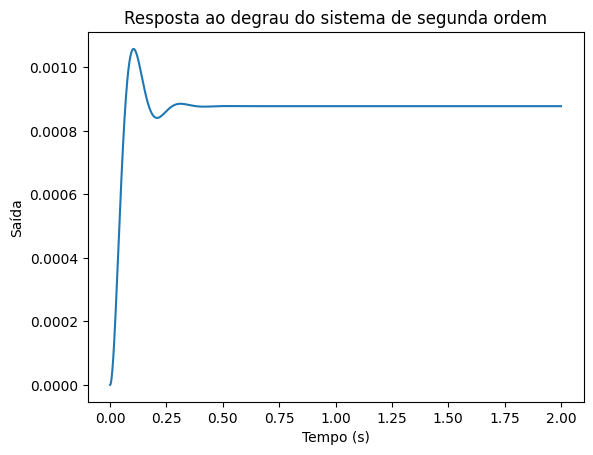

In [72]:
import control
import numpy
import matplotlib.pyplot as plt

# Definir a função de transferência do sistema
H = control.TransferFunction([1], [1, 2*0.45*33.75, 33.75**2])

# Simular a resposta ao degrau do sistema
t = numpy.linspace(0, 2, 1000)
t, y = control.step_response(H, t)

# Obter informações sobre a resposta ao degrau
info = control.step_info(H)
overshoot = info['Overshoot']
settling_time = info['SettlingTime']
print(overshoot,settling_time)

# Plotar o resultado da simulação com informações
# plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.title('Resposta ao degrau do sistema de segunda ordem')
# plt.annotate(f'Sobressinal: {overshoot:.2%}', xy=(settling_time*1.1, overshoot), xytext=(settling_time*1.5, overshoot*0.8),
#              arrowprops=dict(facecolor='black', arrowstyle='->'))
# plt.annotate(f'Tempo de acomodação: {settling_time:.2f}s', xy=(settling_time, 0), xytext=(settling_time*1.2, overshoot*0.1),
#              arrowprops=dict(facecolor='black', arrowstyle='->'))
# plt.savefig('resposta_ao_degrau.png', dpi=300, bbox_inches='tight')  # Salva a figura com ajuste de área de plotagem
plt.show()


## <font color='green' style='font-size: 24px;'> b) sobressinal menor que 5% e tempo de pico em 2 segundos. Mostre por simulação que as respostas estão corretas. <font>

Tempo de pico = 0.70
Sobressinal = 20.53%
Tempo de acomodação = 1.78


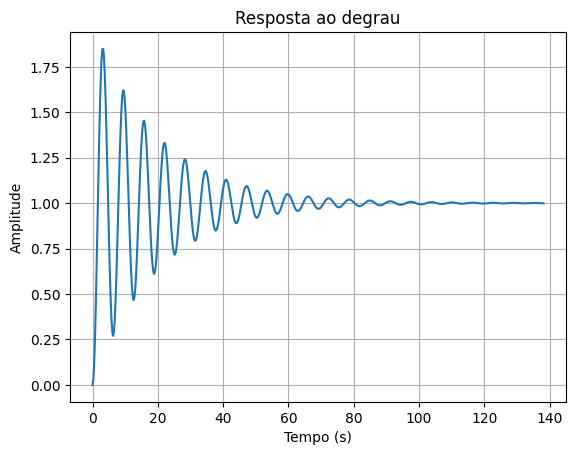

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from control import tf, step_response

# Definindo a função transferência
H = tf([1], [1, 0.1, 1])

# Escolhendo valores de ξ e ωn para atender às especificações de sobressinal e tempo de acomodação
ξ = 0.45
ωn = 5

# Calculando os parâmetros de tempo do sistema
Tp = np.pi / (ωn * np.sqrt(1 - ξ ** 2))
OS = np.exp((-ξ * np.pi) / np.sqrt(1 - ξ ** 2)) * 100
Ta = 4 / (ξ * ωn)

print("Tempo de pico = {:.2f}".format(Tp))
print("Sobressinal = {:.2f}%".format(OS))
print("Tempo de acomodação = {:.2f}".format(Ta))

# Plotando a resposta ao degrau
t, y = step_response(H)
plt.plot(t, y)
plt.grid()
plt.title("Resposta ao degrau")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.show()

# <font color='green' style='font-size: 40px;'>QUESTÃO 8 (fazendo) </font> <hr style='border: 2px solid green;'>


Dois tanques foram dispostos para formarem um processo interativo. Os tanques são iguais e cada um apresenta a mesma dinâmica experimentalmente determinada por um teste ao degrau. Um circuito elétrico RC é elaborado para auxiliar na compreensão do processo, figuras a seguir. As variáveis f’s, h’s, a’s e A representam vazões, níveis, aberturas de válvulas e área da base do tanque, respectivamente.

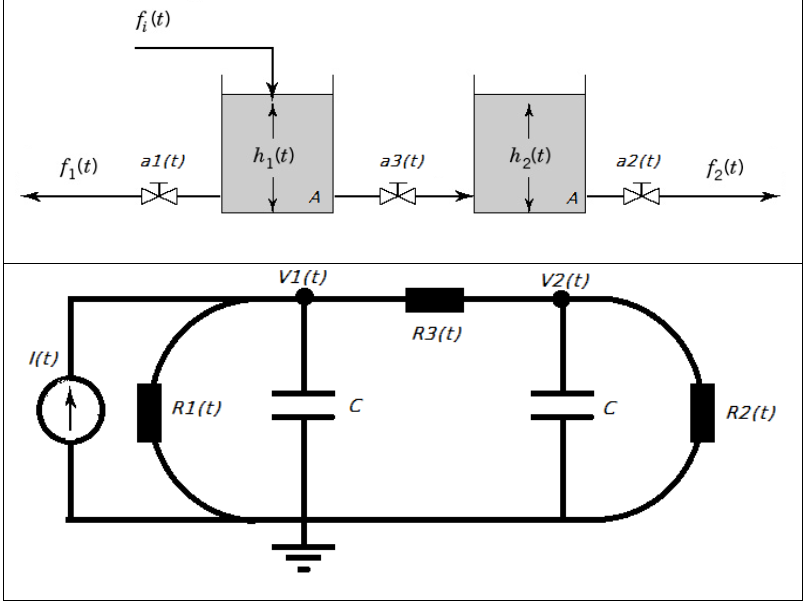


## <font color='green' style='font-size: 24px;'> a) Obtenha a função de transferência V2(s)/I(s). Assume que R1(t)=R2(t)= R=1kohm, R3(t) =R/alfa= 1Kohm/alfa e C= 1mF. Alfa (> 0) é um parâmetro que representa a intensidade de interatividade do processo <font>

Obtenha a função de transferência $\frac{V_2(s)}{I(s)}$. Assume que $R_1(t) = R_2(t) = R = 1kohm$, $R_3(t) =\frac{R}{\alpha} = \frac{1Kohm}{\alpha}$ e C= 1mF. $\alpha > 0 $ é um parâmetro que representa a intensidade de interatividade do processo.

A função transferência $\frac{V_2(s)}{I(s)}$ é dada por :

$$k\alpha \:\frac{s^2}{s^2\left(2\alpha +1\right)+s\left(2\alpha \:+1\right)+1}$$

Onde $\alpha$ é uma constante de interatividade entre os dois tanques (ou capacitores).


## <font color='green' style='font-size: 24px;'> b) Use as funções de transferência para desenhar um diagrama de blocos que mostre explicitamente a interatividade presente no circuito RC. <font>

## <font color='green' style='font-size: 24px;'> c) Calcule os polos do circuito RC e mostre que eles ficam mais distintos a medida que a interatividade aumenta. <font>

## <font color='green' style='font-size: 24px;'> d) Calcule o que acontece com o ganho estático de V2(s)/I(s) a medida que a interatividade aumenta. Nos tanques, qual o efeito disso? <font>